<a href="https://colab.research.google.com/github/ChallaHarika23/Aimlprogram/blob/main/Module2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()
loc_ = list(uploaded.keys())[0]
!unzip -q {loc_}

Saving Module2_ProjectFiles.zip to Module2_ProjectFiles.zip


In [3]:
!pip3 -q install biopython

import pandas as pd
import numpy as np
from Bio import SeqIO
from tqdm.autonotebook import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.9 MB/s eta 0:00:00


<ipython-input-3-5e1163c00ce1>:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
data = pd.read_csv("INDIA_685.csv")
data.head()

,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts
0,hCoV-19/India/1-27/2020|EPI_ISL_413522|2020-01-27,EPI_ISL_413522,Asia / India / Kerala,Kerala,Human,Female,20,Recovered,2020-01-27,Indian Council of Medical Research - National ...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['T2277C', 'C6695T', 'C14657T', 'C17373T', 'G2..."
1,hCoV-19/India/1-31/2020|EPI_ISL_413523|2020-01-31,EPI_ISL_413523,Asia / India / Kerala,Kerala,Human,Male,23,Recovered,2020-01-31,Indian Council of Medical Research-National In...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['A1691G', 'C6501T', 'C8782T', 'C16877T', 'C24..."
2,hCoV-19/India/1063/2020|EPI_ISL_424361|2020-03-10,EPI_ISL_424361,Asia / India,Stateless,Human,Female,33,NaN,2020-03-10,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['G7C', 'C884T', 'G1397A', 'G8653T', 'G11083T'..."
3,hCoV-19/India/1073/2020|EPI_ISL_421662|2020-03-10,EPI_ISL_421662,Asia / India,Stateless,Human,Male,68,unknown,2020-03-10,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'A3472G', 'G8653T', 'T9318..."
4,hCoV-19/India/1093/2020|EPI_ISL_421663|2020-03-10,EPI_ISL_421663,Asia / India,Stateless,Human,Male,45,unknown,2020-03-10,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'C2141A', 'A3472G', 'G8653..."


In [5]:
data.tail()

,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts
680,hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|20...,EPI_ISL_436137,Asia / India / Karnataka,Karnataka,Human,Female,28,Asymptomatic,2020-04-21,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C1281T', 'C4158T', 'G11083T', 'C13730T', 'C2..."
681,hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|20...,EPI_ISL_436138,Asia / India / Karnataka,Karnataka,Human,Male,38,Asymptomatic,2020-04-23,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
682,hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|20...,EPI_ISL_436139,Asia / India / Karnataka,Karnataka,Human,Male,20,Symptomatic,2020-04-23,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
683,hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|20...,EPI_ISL_436140,Asia / India / Karnataka,Karnataka,Human,Female,52,Asymptomatic,2020-04-24,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
684,hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|20...,EPI_ISL_436141,Asia / India / Karnataka,Karnataka,Human,Female,27,Asymptomatic,2020-04-24,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."


In [6]:
from collections import Counter
fasta_seq = SeqIO.parse(open("sequences.fasta"),'fasta')

count = 0
for fasta in fasta_seq:
    count+=1

print("No of sequences is:", count)

No of sequences is: 685


## kmer based methods

Can you find out the hash value for CATCGAG?

(4^0*3)+(4^1*0)+(4^2*2)+(4^3*3)+(4^4*1)+(4^5*0)+(4^6*1)=4579

In [7]:
def calc_score(examplesequence):

    position = 0
    score = 0
    value = 0
    flag = 0
    for base in examplesequence:

        if(base == "A" or base == "a"):
            value = 0
        elif(base == "G" or base == "g"):
            value = 1
        elif(base == "T" or base == "t"):
            value = 2
        elif(base == "C" or base == "c"):
            value = 3
        else:
            flag=1

        score += (4 ** position)* value
        position+=1

    return (flag,score)

calc_score("ATAGTAG")

(0, 4680)

In [8]:
calc_score("CATCGAG")

(0, 4579)

In [9]:
k=5
big_matrix = []
sequences_name = []

fasta_seq = SeqIO.parse(open("sequences.fasta"),'fasta')

for fasta in tqdm(fasta_seq):

    embedding = np.zeros(4**k, dtype=int)
    sequence = str(fasta.seq)
    sequence_name = fasta.id
    sequences_name.append(sequence_name)

    for j in range(len(sequence)-k+1):
        kmer = sequence[j:j+k]
        flag,score = calc_score(kmer)
        if(flag!=1):
            embedding[score]+=1

    embedding = embedding.tolist()
    big_matrix.append(embedding)

0it [00:00, ?it/s]

In [10]:
print("Number of sequences:", len(sequences_name))
print("Number of features for each sequence:", len(big_matrix[0]))

Number of sequences: 685
Number of features for each sequence: 1024


## PCA

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(big_matrix)
pca_data = pca.transform(big_matrix)

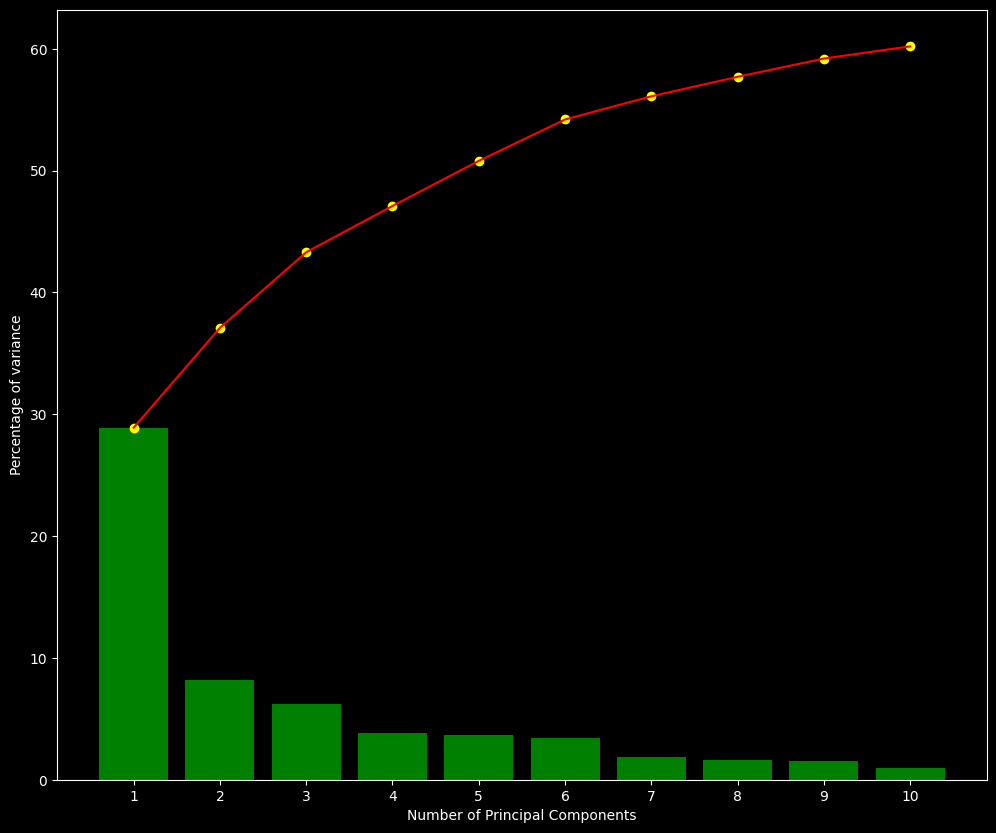

In [31]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labelsal= ['PC'+str(x) for x in range(1, len(per_var)+1)]
per_var=per_var[:10]
labels = [str(x) for x in range(1, len(per_var)+1)]

with plt.style.context('dark_background'):
    plt.figure(figsize = (12, 10))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance")
    plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels, color = "green")
    plt.plot(range(1,len(per_var)+1), np.cumsum(per_var), color = "red")
    plt.scatter(range(1,len(per_var)+1), np.cumsum(per_var), color = "yellow")

In [13]:
df = pd.DataFrame(columns=["StrainID", "PC1", "PC2", "PC3", "State"])
pca_df = pd.DataFrame(pca_data, index=[*sequences_name], columns = labelsal)

for sample in pca_df.index:

    dicti = dict()

    dicti["StrainID"] = sample
    dicti["PC1"] = pca_df.PC1.loc[sample]
    dicti["PC2"] = pca_df.PC2.loc[sample]
    dicti["PC3"] = pca_df.PC3.loc[sample]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]

    df = pd.concat([df, pd.DataFrame([dicti])], ignore_index=True)

df.head()

,StrainID,PC1,PC2,PC3,State
0,hCoV-19/India/763/2020|EPI_ISL_420543|2020-03-03,-12.907821,-4.021927,-1.449015,Stateless
1,hCoV-19/India/770/2020|EPI_ISL_420545|2020-03-03,-12.572173,-4.043568,-1.788090,Stateless
2,hCoV-19/India/772/2020|EPI_ISL_420547|2020-03-03,-12.214220,-4.197740,-1.470469,Stateless
3,hCoV-19/India/773/2020|EPI_ISL_420549|2020-03-03,-12.415940,-4.058472,-2.013084,Stateless
4,hCoV-19/India/777/2020|EPI_ISL_420551|2020-03-03,-12.351067,-4.081956,-1.997244,Stateless


In [14]:
import plotly.graph_objs as go
import plotly.express as px

In [15]:
for_x = df.PC1.tolist()
for_y = df.PC2.tolist()
for_states = df.State.tolist()
for_hover = df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="Principal Component Axis",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"
                })

fig.show(renderer = "colab")

## t-SNE

In [16]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=10000,method='barnes_hut')
tsne_data = model.fit_transform(np.array(big_matrix))


In [17]:
df = pd.DataFrame(columns=["StrainID", "X", "Y", "State"])
tsne_df = pd.DataFrame(pca_data, index=[*sequences_name], columns = labelsal)

i = 0
for sample in tsne_df.index:

    dicti = dict()

    dicti["StrainID"] = sample
    dicti["X"] = tsne_data[i][0]
    dicti["Y"] = tsne_data[i][1]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]

    df = pd.concat([df, pd.DataFrame([dicti])], ignore_index=True)
    i+=1

df.tail()

,StrainID,X,Y,State
680,hCoV-19/India/MaxCov0046_CSIR-IGIB/2020|EPI_IS...,27.584044,9.138146,Delhi
681,hCoV-19/India/MaxCov0047_CSIR-IGIB/2020|EPI_IS...,27.657354,9.158217,Delhi
682,hCoV-19/India/MaxCov0048_CSIR-IGIB/2020|EPI_IS...,28.315950,8.959298,Delhi
683,hCoV-19/India/MaxCov0049_CSIR-IGIB/2020|EPI_IS...,28.743990,8.477834,Delhi
684,hCoV-19/India/MaxCov0050_CSIR-IGIB/2020|EPI_IS...,26.667278,9.737544,Delhi


In [18]:
for_x = df.X.tolist()
for_y = df.Y.tolist()
for_states = df.State.tolist()
for_hover = df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="t-SNE", height=600, width=1000,
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})

fig.show(renderer = 'colab')

Does making the 3 observations become easier in this plot? Can you make any other new observations from this plot?

yes making 3 observations become easier but we can make new observations from this plot like karnataka is away from other clusters.

## Make sure you tweak the parameters to find out if a certain different setting is allowing you to get a more interpretable plot.

In [19]:
rs=20150201
model = TSNE(random_state=rs, perplexity=35, n_iter=8000,method='barnes_hut')
tsne_data = model.fit_transform(np.array(big_matrix))


In [20]:
df = pd.DataFrame(columns=["StrainID", "X", "Y", "State"])
tsne_df = pd.DataFrame(pca_data, index=[*sequences_name], columns = labelsal)

i = 0
for sample in tsne_df.index:

    dicti = dict()

    dicti["StrainID"] = sample
    dicti["X"] = tsne_data[i][0]
    dicti["Y"] = tsne_data[i][1]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]

    df = pd.concat([df, pd.DataFrame([dicti])], ignore_index=True)
    i+=1

df.tail()

,StrainID,X,Y,State
680,hCoV-19/India/MaxCov0046_CSIR-IGIB/2020|EPI_IS...,18.860746,18.657766,Delhi
681,hCoV-19/India/MaxCov0047_CSIR-IGIB/2020|EPI_IS...,18.912458,18.710075,Delhi
682,hCoV-19/India/MaxCov0048_CSIR-IGIB/2020|EPI_IS...,19.501703,18.787048,Delhi
683,hCoV-19/India/MaxCov0049_CSIR-IGIB/2020|EPI_IS...,20.020510,18.539061,Delhi
684,hCoV-19/India/MaxCov0050_CSIR-IGIB/2020|EPI_IS...,17.858736,18.820112,Delhi


In [21]:
for_x = df.X.tolist()
for_y = df.Y.tolist()
for_states = df.State.tolist()
for_hover = df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="t-SNE", height=600, width=1000,
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})

fig.show(renderer = 'colab')

In [22]:
rs=0
model = TSNE(init="pca",random_state=rs, perplexity=10, n_iter=2800,method='exact')
tsne_data = model.fit_transform(np.array(big_matrix))


In [23]:
df = pd.DataFrame(columns=["StrainID", "X", "Y", "State"])
tsne_df = pd.DataFrame(pca_data, index=[*sequences_name], columns = labelsal)

i = 0
for sample in tsne_df.index:

    dicti = dict()

    dicti["StrainID"] = sample
    dicti["X"] = tsne_data[i][0]
    dicti["Y"] = tsne_data[i][1]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]

    df = pd.concat([df, pd.DataFrame([dicti])], ignore_index=True)
    i+=1

df.tail()

,StrainID,X,Y,State
680,hCoV-19/India/MaxCov0046_CSIR-IGIB/2020|EPI_IS...,74.754013,-0.722723,Delhi
681,hCoV-19/India/MaxCov0047_CSIR-IGIB/2020|EPI_IS...,74.379166,-1.342882,Delhi
682,hCoV-19/India/MaxCov0048_CSIR-IGIB/2020|EPI_IS...,76.683113,-0.769374,Delhi
683,hCoV-19/India/MaxCov0049_CSIR-IGIB/2020|EPI_IS...,77.120003,-1.897065,Delhi
684,hCoV-19/India/MaxCov0050_CSIR-IGIB/2020|EPI_IS...,72.935036,-0.491354,Delhi


In [24]:
for_x = df.X.tolist()
for_y = df.Y.tolist()
for_states = df.State.tolist()
for_hover = df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="t-SNE", height=600, width=1000,
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})

fig.show(renderer = 'colab')

### Gujarat  form a cluster other then 3 observations.

## Mutation Profile based methods

In [25]:
mutations = []
for i in range(len(data)):

    sample_muts = data["Nuc_muts"][i][1:][:-1].split(",")

    for j in sample_muts:
        mut = j.strip()[1:][:-1]
        if(len(mut)>=2):
            if(mut not in mutations):
                mutations.append(mut)

print(len(mutations))

1279


In [26]:
samplelist = data["StrainID"].tolist()
df = pd.DataFrame(columns = [*samplelist])
df = df.replace(np.nan,0)

for mutation in mutations:

    dicti = dict(zip(samplelist, np.zeros(len(samplelist), dtype=int)))

    for i in range(len(data)):
        flag=0
        strainid = data["StrainID"][i]
        sample_muts = data["Nuc_muts"][i][1:][:-1].split(",")

        for j in sample_muts:
            mut = j.strip()[1:][:-1]
            if(len(mut)>=2):
                if(mut == mutation):
                    flag = 1
                    break

        dicti[strainid]=flag

    df = pd.concat([df, pd.DataFrame([dicti])], ignore_index=True)

df = df.T

df.tail()

,0,1,2,3,4,5,6,7,8,9,...,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278
hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|2020-04-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|2020-04-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|2020-04-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|2020-04-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|2020-04-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [27]:
pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)

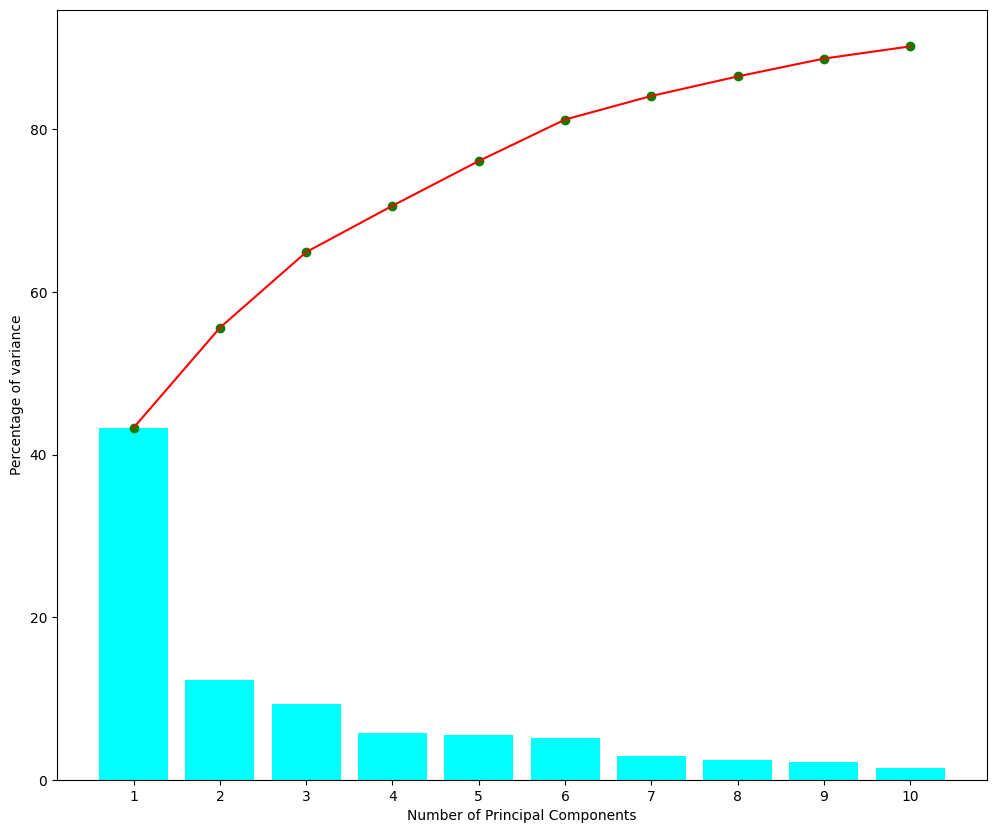

In [58]:
per_var = np.round(pca.explained_variance_ratio_*150, decimals=1)
labelsal = ['PC'+str(x) for x in range(1, len(per_var)+1)]
per_var=per_var[:10]
labels = [str(x) for x in range(1, len(per_var)+1)]

with plt.style.context('seaborn-dark-palette'):
    plt.figure(figsize = (12, 10))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance")
    plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels, color = "aqua")
    plt.plot(range(1,len(per_var)+1), np.cumsum(per_var), color = "red")
    plt.scatter(range(1,len(per_var)+1), np.cumsum(per_var), color = "green")

In [59]:
df = pd.DataFrame(columns=["StrainID", "PC1", "PC2", "State"])
pca_df = pd.DataFrame(pca_data, index=[*samplelist], columns = labelsal)

for sample in pca_df.index:

    dicti = dict()

    dicti["StrainID"] = sample
    dicti["PC1"] = pca_df.PC1.loc[sample]
    dicti["PC2"] = pca_df.PC2.loc[sample]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]

    df = pd.concat([df, pd.DataFrame([dicti])], ignore_index=True)

df.tail()

,StrainID,PC1,PC2,State
680,hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|20...,1.530221,0.079550,Karnataka
681,hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|20...,-1.063943,-0.405022,Karnataka
682,hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|20...,-1.058232,-0.410670,Karnataka
683,hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|20...,-1.057465,-0.409620,Karnataka
684,hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|20...,-1.057465,-0.409620,Karnataka


In [60]:
x = df.PC1.tolist()
y = df.PC2.tolist()
states = df.State.tolist()
for_hover = df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=states, height=600, width=1200,
                 title="Principal Component Axis",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})
fig.show(renderer = 'colab')

The first one, is that for some reason the pink dots (Gujarat) are scattered away from the big main cluster.


The second is delhi,West Bengal and Odisha forms cluster which is away from first one.


## t-SNE

In [32]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=10000,method='barnes_hut')
tsne_data = model.fit_transform(np.array(big_matrix))

In [33]:
df = pd.DataFrame(columns=["StrainID", "X", "Y", "State"])
tsne_df = pd.DataFrame(pca_data, index=[*sequences_name], columns = labelsal)

i = 0
for sample in tsne_df.index:

    dicti = dict()

    dicti["StrainID"] = sample
    dicti["X"] = tsne_data[i][0]
    dicti["Y"] = tsne_data[i][1]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]

    df = pd.concat([df, pd.DataFrame([dicti])], ignore_index=True)
    i+=1

df.tail()

,StrainID,X,Y,State
680,hCoV-19/India/MaxCov0046_CSIR-IGIB/2020|EPI_IS...,27.584044,9.138146,Delhi
681,hCoV-19/India/MaxCov0047_CSIR-IGIB/2020|EPI_IS...,27.657354,9.158217,Delhi
682,hCoV-19/India/MaxCov0048_CSIR-IGIB/2020|EPI_IS...,28.315950,8.959298,Delhi
683,hCoV-19/India/MaxCov0049_CSIR-IGIB/2020|EPI_IS...,28.743990,8.477834,Delhi
684,hCoV-19/India/MaxCov0050_CSIR-IGIB/2020|EPI_IS...,26.667278,9.737544,Delhi


In [34]:
for_x = df.X.tolist()
for_y = df.Y.tolist()
for_states = df.State.tolist()
for_hover = df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="t-SNE", height=600, width=1000,
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})

fig.show(renderer = 'colab')

In [35]:
from sklearn.manifold import TSNE
rs=20250101
model = TSNE(n_components=2, random_state=rs, perplexity=40, n_iter=20000,method='barnes_hut')
tsne_data = model.fit_transform(np.array(big_matrix))

In [36]:
df = pd.DataFrame(columns=["StrainID", "X", "Y", "State"])
tsne_df = pd.DataFrame(pca_data, index=[*sequences_name], columns = labelsal)

i = 0
for sample in tsne_df.index:

    dicti = dict()

    dicti["StrainID"] = sample
    dicti["X"] = tsne_data[i][0]
    dicti["Y"] = tsne_data[i][1]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]

    df = pd.concat([df, pd.DataFrame([dicti])], ignore_index=True)
    i+=1

df.tail()

,StrainID,X,Y,State
680,hCoV-19/India/MaxCov0046_CSIR-IGIB/2020|EPI_IS...,15.073686,17.591375,Delhi
681,hCoV-19/India/MaxCov0047_CSIR-IGIB/2020|EPI_IS...,15.124179,17.651957,Delhi
682,hCoV-19/India/MaxCov0048_CSIR-IGIB/2020|EPI_IS...,15.593809,17.744215,Delhi
683,hCoV-19/India/MaxCov0049_CSIR-IGIB/2020|EPI_IS...,16.082037,17.547787,Delhi
684,hCoV-19/India/MaxCov0050_CSIR-IGIB/2020|EPI_IS...,14.145848,17.652212,Delhi


In [37]:
for_x = df.X.tolist()
for_y = df.Y.tolist()
for_states = df.State.tolist()
for_hover = df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="t-SNE", height=600, width=1000,
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})

fig.show(renderer = 'colab')

In [72]:
from sklearn.manifold import TSNE
model = TSNE(init='pca',n_components=2, random_state=0, perplexity=2, n_iter=14000,method='barnes_hut')
tsne_data = model.fit_transform(np.array(big_matrix))
df = pd.DataFrame(columns=["StrainID", "X", "Y", "State"])
tsne_df = pd.DataFrame(pca_data, index=[*sequences_name], columns = labelsal)

i = 0
for sample in tsne_df.index:

    dicti = dict()

    dicti["StrainID"] = sample
    dicti["X"] = tsne_data[i][0]
    dicti["Y"] = tsne_data[i][1]
    dicti["State"] = data[data["StrainID"]==sample]["State"].tolist()[0]

    df = pd.concat([df, pd.DataFrame([dicti])], ignore_index=True)
    i+=1

df.tail()

,StrainID,X,Y,State
680,hCoV-19/India/MaxCov0046_CSIR-IGIB/2020|EPI_IS...,100.047104,-43.519630,Delhi
681,hCoV-19/India/MaxCov0047_CSIR-IGIB/2020|EPI_IS...,100.812164,-44.338467,Delhi
682,hCoV-19/India/MaxCov0048_CSIR-IGIB/2020|EPI_IS...,90.502739,-49.676125,Delhi
683,hCoV-19/India/MaxCov0049_CSIR-IGIB/2020|EPI_IS...,90.074364,-51.716389,Delhi
684,hCoV-19/India/MaxCov0050_CSIR-IGIB/2020|EPI_IS...,99.522232,-41.098026,Delhi


In [73]:
for_x = df.X.tolist()
for_y = df.Y.tolist()
for_states = df.State.tolist()
for_hover = df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="t-SNE", height=600, width=1000,
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})

fig.show(renderer = 'colab')

# Observation 1:


1.Samples from Odisha are different than the rest of the country, hence they were scattered away from the all clusters.

# Observation 2:

2.Telangana(RED),Tamilnadu(green) and Delhi(Purple) form a cluster which is away from primary cluster.

# Observation 3:

3.Gujarat(magenta) forms dense cluster.




## New Observation

Maharashtra(yellow) forms a cluster far from other country when the  perplexity=2.

## Isomap

In [68]:
from sklearn.manifold import TSNE, Isomap
import numpy as np
import pandas as pd

isomap = Isomap(n_neighbors=50, n_components=2)
isomap_data = isomap.fit_transform(np.array(big_matrix))

isomap_df = pd.DataFrame(columns=["StrainID", "X", "Y", "State"])

i = 0
for sample in tsne_df.index:
    dicti = dict()
    dicti["StrainID"] = sample
    dicti["X"] = isomap_data[i][0]
    dicti["Y"] = isomap_data[i][1]
    dicti["State"] = data[data["StrainID"] == sample]["State"].tolist()[0]

    isomap_df = pd.concat([isomap_df, pd.DataFrame([dicti])], ignore_index=True)
    i += 1

isomap_df.tail()


,StrainID,X,Y,State
680,hCoV-19/India/MaxCov0046_CSIR-IGIB/2020|EPI_IS...,47.319580,13.637368,Delhi
681,hCoV-19/India/MaxCov0047_CSIR-IGIB/2020|EPI_IS...,47.401288,-3.362974,Delhi
682,hCoV-19/India/MaxCov0048_CSIR-IGIB/2020|EPI_IS...,52.153890,-3.912817,Delhi
683,hCoV-19/India/MaxCov0049_CSIR-IGIB/2020|EPI_IS...,56.558325,-4.572636,Delhi
684,hCoV-19/India/MaxCov0050_CSIR-IGIB/2020|EPI_IS...,25.745376,10.667947,Delhi


In [69]:
for_x = isomap_df.X.tolist()
for_y = isomap_df.Y.tolist()
for_states = isomap_df.State.tolist()
for_hover = isomap_df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="Isomap", height=600, width=1000,
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})

fig.show(renderer = 'colab')

In [76]:
from sklearn.manifold import TSNE, Isomap
import numpy as np
import pandas as pd

isomap = Isomap(n_neighbors=150, n_components=3)
isomap_data = isomap.fit_transform(np.array(big_matrix))

isomap_df = pd.DataFrame(columns=["StrainID", "X", "Y", "State"])

i = 0
for sample in tsne_df.index:
    dicti = dict()
    dicti["StrainID"] = sample
    dicti["X"] = isomap_data[i][0]
    dicti["Y"] = isomap_data[i][1]
    dicti["State"] = data[data["StrainID"] == sample]["State"].tolist()[0]

    isomap_df = pd.concat([isomap_df, pd.DataFrame([dicti])], ignore_index=True)
    i += 1

isomap_df.tail()


,StrainID,X,Y,State
680,hCoV-19/India/MaxCov0046_CSIR-IGIB/2020|EPI_IS...,33.161551,0.346311,Delhi
681,hCoV-19/India/MaxCov0047_CSIR-IGIB/2020|EPI_IS...,32.875730,0.499391,Delhi
682,hCoV-19/India/MaxCov0048_CSIR-IGIB/2020|EPI_IS...,37.863857,2.464344,Delhi
683,hCoV-19/India/MaxCov0049_CSIR-IGIB/2020|EPI_IS...,42.367017,0.634593,Delhi
684,hCoV-19/India/MaxCov0050_CSIR-IGIB/2020|EPI_IS...,25.187003,1.344153,Delhi


In [77]:
for_x = isomap_df.X.tolist()
for_y = isomap_df.Y.tolist()
for_states = isomap_df.State.tolist()
for_hover = isomap_df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="Isomap", height=600, width=1000,
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"})

fig.show(renderer = 'colab')

### With Using Isomap also the observations are similar to t-SNE and PCA.